In [1]:
"""
Create a K-Means solution and determine which number of clusters is best for Iris dataset. 

"""

"\nGet the silhouette coefficient of the two-cluster k-means solution. \nYou'll notice that the silhouette coefficient will turn out to be greater than the one above, \nwhere the cluster number is three. You know that the Iris dataset consists of three different clusters. \nSo the silhouette score of the solution where the number of clusters is equal to the correct number of classes is \nactually lower than the silhouette score of the solution where the number of clusters is different from the correct number of classes. \nCan you explain why this is?\n\n"

In [2]:
# Import packages

import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

In [3]:
# Loading the data from scikit-learn's dataset

iris = datasets.load_iris()
x = iris.data
y = iris.target

# Standardizing the features
scaler = StandardScaler()
x_std = scaler.fit_transform(x)

# Computing the first principal components

pca = PCA(n_components = 2)
x_pca = pca.fit_transform(x_std)

# Splitting the data into four equally sized samples. First, break it in half:

x_half1, x_half2, x_pcahalf1, x_pcahalf2 = train_test_split(
    x_std,
    x_pca,
    test_size = 0.5,
    random_state = 13579)


In [5]:
# DataFrame to store features and predicted cluster memberships
ypred = pd.DataFrame()

# Pass a list of tuples and a counter that increments each time that you go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. You use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the DataFrame.
for counter, data in enumerate([
    (x_half1, x_pcahalf1),
    (x_half2, x_pcahalf2)]):
    
    # Put the features into `ypred`
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 2-4.
    for nclust in range(2, 5):
        pred = KMeans(n_clusters=nclust, random_state=123).fit_predict(data[counter])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred

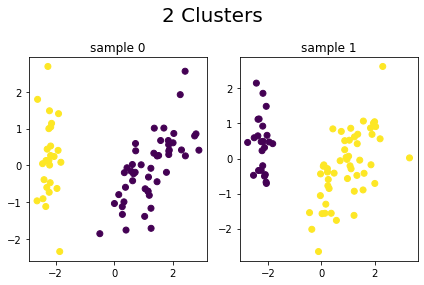

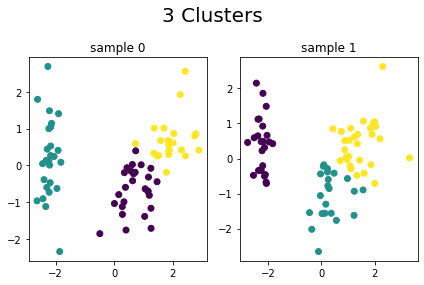

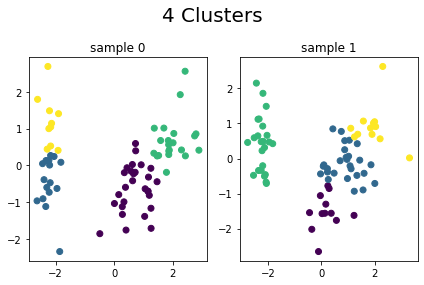

In [6]:
# For each  number of clusters, plot the clusters using the
# PCA features for each sample
for cluster in range(2, 5):
    
    # Make a grid of subplots
    f, axarr = plt.subplots(1, 2)
    
    # Make a plot for each sample
    for i in range(2):
        
        # PCA-created features
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid
        axarr[i].scatter(x_sub, y_sub, c=c)
        axarr[i].set_title('sample {}'.format(i))
    
    # Space out the plots so that the headings don't overlap axis values
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

In [8]:
# Get predicted clusters
full_pred = KMeans(n_clusters=3, random_state=123).fit_predict(x_std)

pd.crosstab(y, full_pred) 

col_0,0,1,2
row_0,,,
0,0,50,0
1,39,0,11
2,14,0,36


In [9]:
# Predict cluster membership

full_pred = np.array([0 if x == 1 else 1 if x==0 else 2 for x in full_pred])

pd.crosstab(y, full_pred) 

col_0,0,1,2
row_0,,,
0,50,0,0
1,0,39,11
2,0,14,36


In [ ]:
# Assess the consistency of the solutions using visualization. Which one seems to be the best?

""" 

Two clusters appears the best. There is a clear separation of clusters in each of the two samples. As the number of clusters increase
it appears some points can belong in two clusters -- its color and the cluster right next to it.
K-Means is a hard clustering technique though I can understand a case for three clusters. 

"""